In [5]:
import os
import contextlib
import math

import torch
import torch.distributions as dist
import zuko

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('https://raw.githubusercontent.com/dominik-strutz/dotfiles/main/mystyle.mplstyle')

import shapely

import xarray as xr
import pandas as pd

import cartopy.crs as ccrs

from helper_functions import *
from geographic_data import *

In [6]:
from geographic_data import area_boundaries, landmarks
from utils import plot_cities

lat_min, lon_min = np.min(area_boundaries, axis=0)
lat_max, lon_max = np.max(area_boundaries, axis=0)

print(f"Latitude: {lat_min} - {lat_max}")
print(f"Longitude: {lon_min} - {lon_max}")

study_area = shapely.geometry.Polygon(area_boundaries)

ImportError: cannot import name 'area_boundaries' from 'geographic_data' (/home/dstrutz/sshfs/BED/Endurance_CCS_design_study/geographic_data.py)

# Landmarks

In [ ]:
display(landmarks)

,lat,lon
Hull,53.745670,-0.336741
Scarbrough,54.283113,-0.399752
Boulby Mine,54.558904,-0.827224
Leeds,53.800755,-1.549077
Sheffield,53.381129,-1.470085
Grimsby,53.565269,-0.075683
Middlesbrough,54.574227,-1.234956


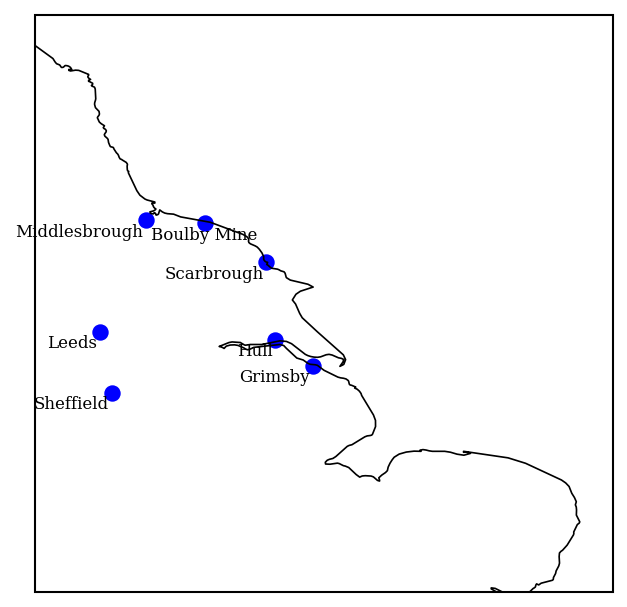

In [ ]:
projPC = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.set_extent(
    [lon_min, lon_max, lat_min, lat_max],
    crs=ccrs.PlateCarree()
    )

plot_cities(ax, projPC, landmarks)

ax.coastlines()
plt.show()

# CCS site

Information from: 

- https://nstauthority.maps.arcgis.com/apps/webappviewer/index.html?id=fa957c4868c2439f95ddd86bc077d766
- https://storymaps.arcgis.com/stories/96cc1f82b1a8440990876f2e88c36015
- https://opendata-thecrownestate.opendata.arcgis.com/datasets/22a1be6fb0c5416e9369f97743f387b1/explore?location=54.084187%2C1.341088%2C8.6


In [ ]:
def dms_to_dd(x):
    d, m, s = x
    if d<0:
        dd = d - m/60 - s/3600
    else:
        dd = d + m/60 + s/3600
    return dd

# test = np.vstack( [list(map(dms_to_dd, wells[:, 0])), list(map(dms_to_dd, wells[:, 1]))] ).T

In [ ]:
from geographic_data import bp_ccs_area_1_latlon, bp_ccs_area_2_latlon, endurance_area_latlon

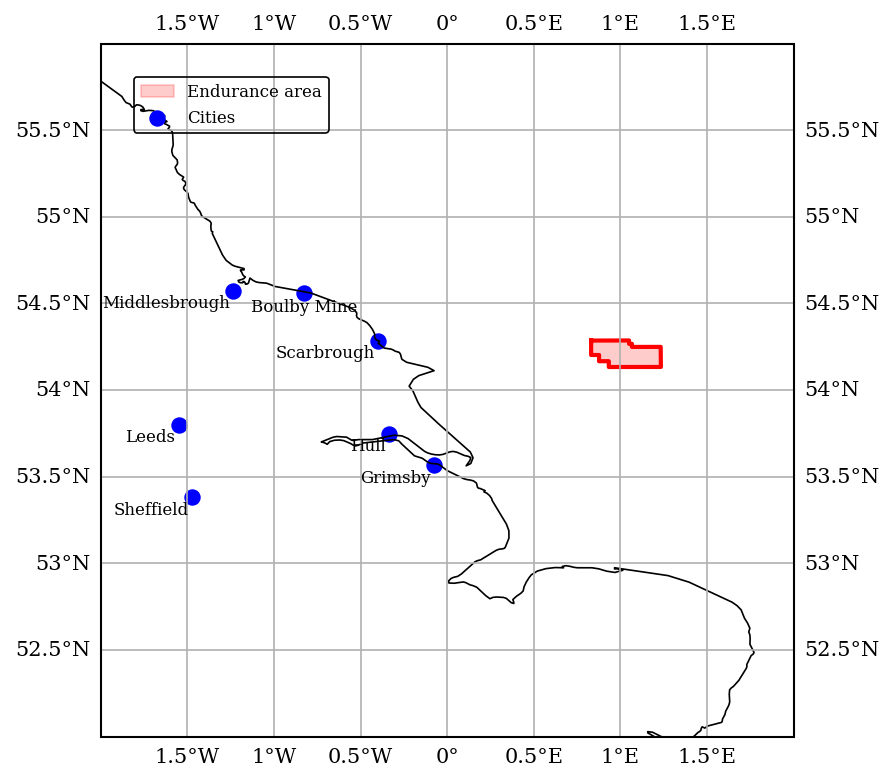

In [ ]:
projPC = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection=projPC))

ax.set_extent(
    [lon_min, lon_max, lat_min, lat_max],
    crs=ccrs.PlateCarree()
    )

ax.plot(endurance_area_latlon[:, 1], endurance_area_latlon[:, 0], color='red', linewidth=2, transform=projPC)
ax.fill(endurance_area_latlon[:, 1], endurance_area_latlon[:, 0], color='red', alpha=0.2, transform=projPC, label='Endurance area')

plot_cities(ax, projPC, landmarks)

ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)

ax.legend(loc='upper left')

ax.coastlines()
plt.show()

# Windfarm site

- https://infrastructure.planninginspectorate.gov.uk/projects/yorkshire-and-the-humber/hornsea-project-four-offshore-wind-farm/?ipcsection=docs&stage=app&filter1=Plans
- https://infrastructure.planninginspectorate.gov.uk/wp-content/ipc/uploads/projects/EN010098/EN010098-000550-D1.2.1%20PAD%20Volume%20D1%20Annex%202.1%20Offshore%20Order%20Limits%20and%20Grid%20Coordinates%20Plan.pdf

In [ ]:
from geographic_data import hornsea_4_latlon

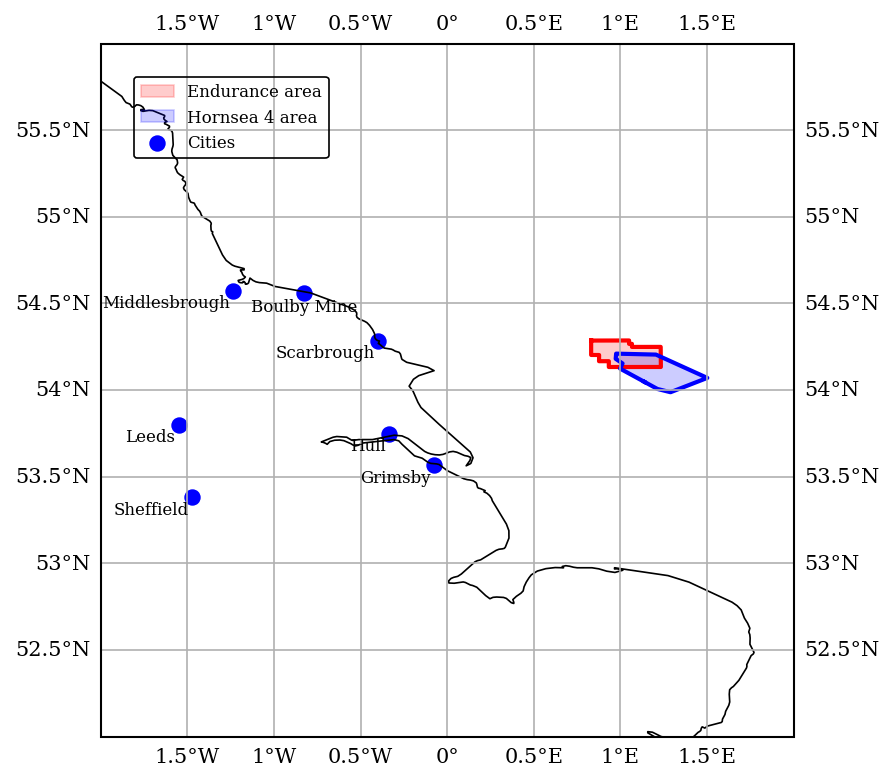

In [ ]:
projPC = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection=projPC))

ax.set_extent(
    [lon_min, lon_max, lat_min, lat_max],
    crs=ccrs.PlateCarree()
    )

ax.plot(endurance_area_latlon[:, 1], endurance_area_latlon[:, 0], color='red', linewidth=2, transform=projPC)
ax.fill(endurance_area_latlon[:, 1], endurance_area_latlon[:, 0], color='red', alpha=0.2, transform=projPC, label='Endurance area')

ax.plot(hornsea_4_latlon[:, 1], hornsea_4_latlon[:, 0], color='blue', linewidth=2, transform=projPC)
ax.fill(hornsea_4_latlon[:, 1], hornsea_4_latlon[:, 0], color='blue', alpha=0.2, transform=projPC, label='Hornsea 4 area')

plot_cities(ax, projPC, landmarks)

ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)

ax.legend(loc='upper left')

ax.coastlines()
plt.show()

# Seismic Stations

Information from: 

- fdsn.org/networks/detail/GB/
- https://www.earthquakes.bgs.ac.uk/data/broadband_stationbook.html

In [ ]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.core.inventory import read_inventory


if not os.path.exists('endurance_land_stations.xml'):
    fdsn_client = Client('IRIS')

    #TODO: UKarray (UR) stations are not available on fdsn

    inv = fdsn_client.get_stations(
        network='GB,UR',
        starttime=UTCDateTime('2023-01-01'),
        minlatitude=lat_min, maxlatitude=lat_max, 
        minlongitude=lon_min, maxlongitude=lon_max,
        level='channel'
        )

    inv.write('endurance_land_stations.xml', format='stationxml')

else:
    inv = read_inventory('endurance_land_stations.xml')


seismic_inventory = {}
for sta in inv[0]:
    seismic_inventory[sta.code] = {'latitude': sta.latitude, 'longitude': sta.longitude, 'elevation': sta.elevation}
seismic_inventory = pd.DataFrame(seismic_inventory).T

In [ ]:
display(seismic_inventory)

,latitude,longitude,elevation
CWF,52.738499,-1.307670,203.0
EDMD,54.831200,-1.963600,337.0
ELMS,52.093330,0.989500,74.0
GDLE,54.421830,-0.815670,228.0
HPK,53.958172,-1.624168,233.0
LBWR,53.401600,-1.724698,353.0
LMK,53.457298,-0.327400,133.0
WACR,52.724602,0.626600,66.0


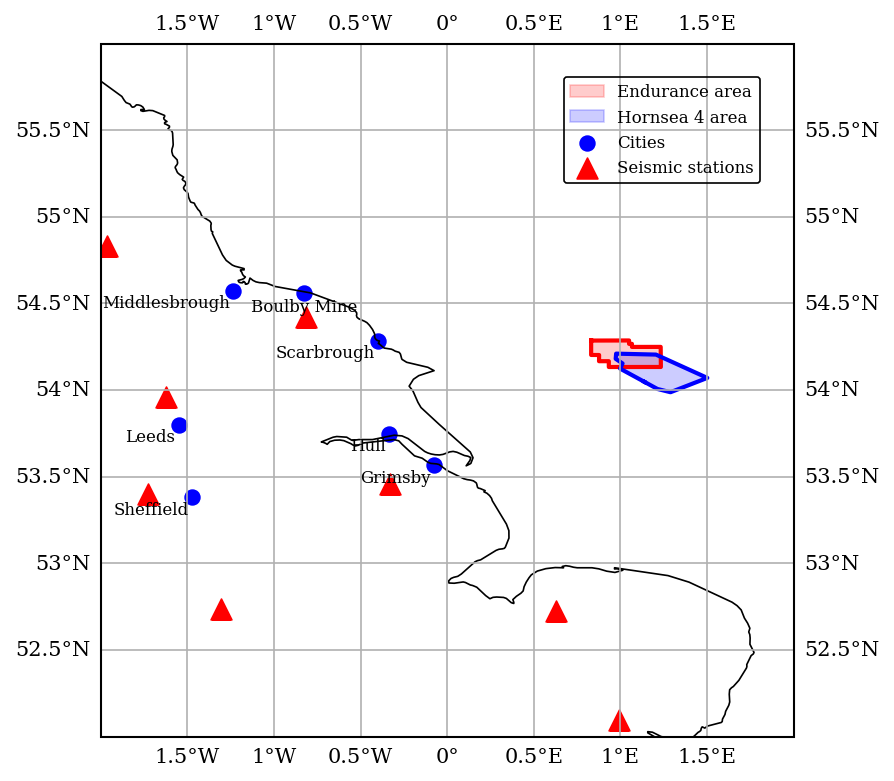

In [ ]:
projPC = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection=projPC))

ax.set_extent(
    [lon_min, lon_max, lat_min, lat_max],
    crs=ccrs.PlateCarree()
    )

ax.plot(endurance_area_latlon[:, 1], endurance_area_latlon[:, 0], color='red', linewidth=2, transform=projPC)
ax.fill(endurance_area_latlon[:, 1], endurance_area_latlon[:, 0], color='red', alpha=0.2, transform=projPC, label='Endurance area')

ax.plot(hornsea_4_latlon[:, 1], hornsea_4_latlon[:, 0], color='blue', linewidth=2, transform=projPC)
ax.fill(hornsea_4_latlon[:, 1], hornsea_4_latlon[:, 0], color='blue', alpha=0.2, transform=projPC, label='Hornsea 4 area')

plot_cities(ax, projPC, landmarks)

ax.scatter(
    seismic_inventory['longitude'], seismic_inventory['latitude'], transform=ccrs.PlateCarree(),
    s=100, marker='^', color='red', label='Seismic stations')


ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
ax.legend(loc='upper right')

ax.coastlines()
plt.show()

#  Topography

In [2]:
topo_filepath = 'data/south_west_UK_SRTM15Plus.asc'

topo_data = np.loadtxt(topo_filepath, skiprows=6)

topo_data = xr.DataArray(
    data=topo_data.T,
    dims=['E', 'N'],
    coords=dict(
        N=np.linspace(lat_min, lat_max, topo_data.shape[0])[::-1],
        E=np.linspace(lon_min, lon_max, topo_data.shape[1]),
    ),
    )

N_xy = 100

topo_data = topo_data.rename({'E': 'longitude', 'N': 'latitude'})
topo_data = topo_data.interp(latitude=np.linspace(lat_min, lat_max, N_xy), longitude=np.linspace(lon_min, lon_max, N_xy))

topo_data = add_distance_coordinates(topo_data)

NameError: name 'lat_min' is not defined

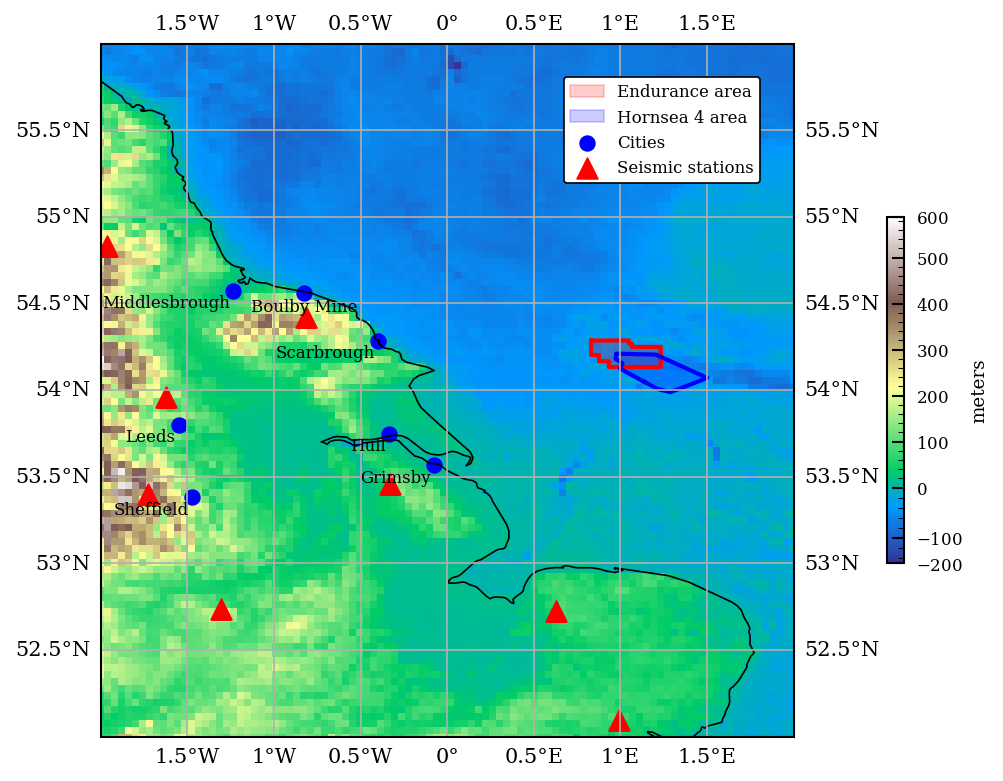

In [ ]:
projPC = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection=projPC))

ax.set_extent(
    [lon_min, lon_max, lat_min, lat_max],
    crs=ccrs.PlateCarree()
    )

norm = FixPointNormalize(sealevel=0, vmin=np.nanmin(topo_data), vmax=np.nanmax(topo_data))
im = xr.plot.imshow(
    topo_data, cmap='terrain', x='longitude', y='latitude', xlim=(lon_min, lon_max), ylim=(lat_min, lat_max),
    norm=norm, vmin=np.nanmin(topo_data), vmax=np.nanmax(topo_data),
    add_colorbar=False)

ax.plot(endurance_area_latlon[:, 1], endurance_area_latlon[:, 0], color='red', linewidth=2, transform=projPC)
ax.fill(endurance_area_latlon[:, 1], endurance_area_latlon[:, 0], color='red', alpha=0.2, transform=projPC, label='Endurance area')

ax.plot(hornsea_4_latlon[:, 1], hornsea_4_latlon[:, 0], color='blue', linewidth=2, transform=projPC)
ax.fill(hornsea_4_latlon[:, 1], hornsea_4_latlon[:, 0], color='blue', alpha=0.2, transform=projPC, label='Hornsea 4 area')

plot_cities(ax, projPC, landmarks)

ax.scatter(
    seismic_inventory['longitude'], seismic_inventory['latitude'], transform=ccrs.PlateCarree(),
    s=100, marker='^', color='red', label='Seismic stations')


ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)

legend = ax.legend(loc='upper right', frameon=True, facecolor='white')

fig.colorbar(im, label='meters', shrink=0.5, ax=ax, pad=0.1)

ax.coastlines()
plt.show()

In [ ]:
bp_ccs_area_1_xy  = latlong2xy(bp_ccs_area_1_latlon[:, 0], bp_ccs_area_1_latlon[:, 1], topo_data)
bp_ccs_area_2_xy  = latlong2xy(bp_ccs_area_2_latlon[:, 0], bp_ccs_area_2_latlon[:, 1], topo_data)
endurance_area_xy = latlong2xy(endurance_area_latlon[:, 0], endurance_area_latlon[:, 1], topo_data)
hornsea_4_xy      = latlong2xy(hornsea_4_latlon[:, 0], hornsea_4_latlon[:, 1], topo_data)

In [ ]:
topo_data.max()

<xarray.DataArray ()>
array(588.63636364)

# Crustal Model

In [ ]:
dx, dy = topo_data.coords['E'].diff('E')[1].data, topo_data.coords['N'].diff('N')[1].data

z_max =   600 # m
z_min = -3600 # m

dz = 50 # m

N_z = int((z_max - z_min) / dz)

z = np.linspace(z_max, z_min, N_z)

In [ ]:
seimic3Dmodel = construct3Dseismicmodel(z, topo_data)

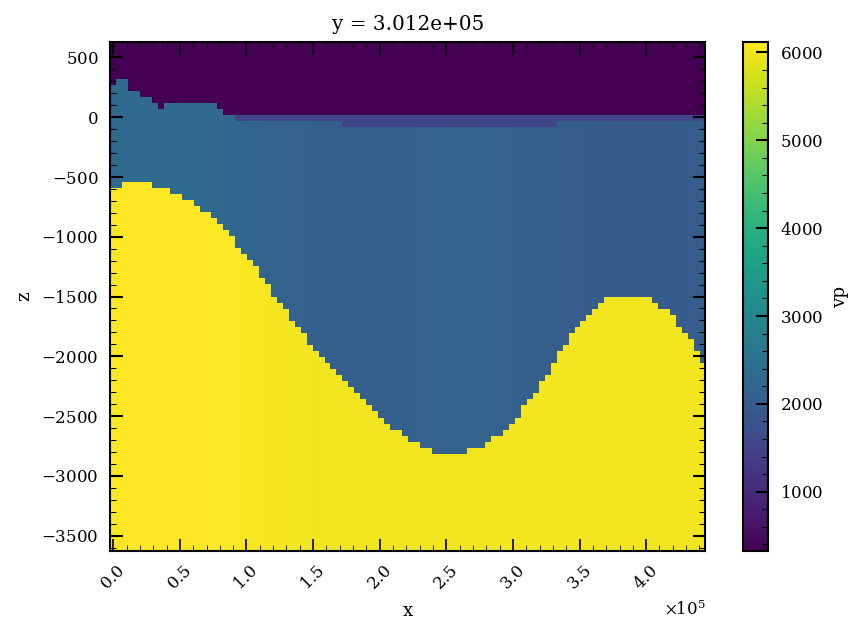

In [ ]:
# seimic3Dmodel_plotting = xr.where(seimic3Dmodel > 350, seimic3Dmodel, np.nan) # remove air
seimic3Dmodel_plotting = seimic3Dmodel
# import scipy.stats
# weight = xr.DataArray(scipy.stats.norm(0, 1).pdf(np.linspace(-3, 3, 10)), dims=['window'])
# test_plotting = test_plotting.rolling(z=10, center=True, min_periods=1).construct('window').dot(weight)def dms_to_dd(x):
    

seimic3Dmodel_plotting.sel(y=300_000, method='nearest')['vp'].plot(x='x', y='z')
plt.xticks(rotation=45)
plt.show()

# Seismicity Prior

In [20]:
from utils import latlong2xy

wells_coords_latlon = np.array(
    [[54.20020528, 0.9916635 , -1020.0],
     [54.24513067, 0.97697506, -1020.0],
     [54.23250939, 1.03511106, -1020.0],
     [54.19777192, 1.05146139, -1020.0],
     [54.21851681, 0.96272839, -1020.0],]
)

well_coords_xy = np.hstack( [latlong2xy(wells_coords_latlon[:, 0], wells_coords_latlon[:, 1], topo_data), wells_coords_latlon[:, 2].reshape(-1, 1)])

/tmp/ipykernel_11132/2218293414.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{x/1000:.0f}' for x in ax.get_xticks()])
/tmp/ipykernel_11132/2218293414.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y/1000:.0f}' for y in ax.get_yticks()])


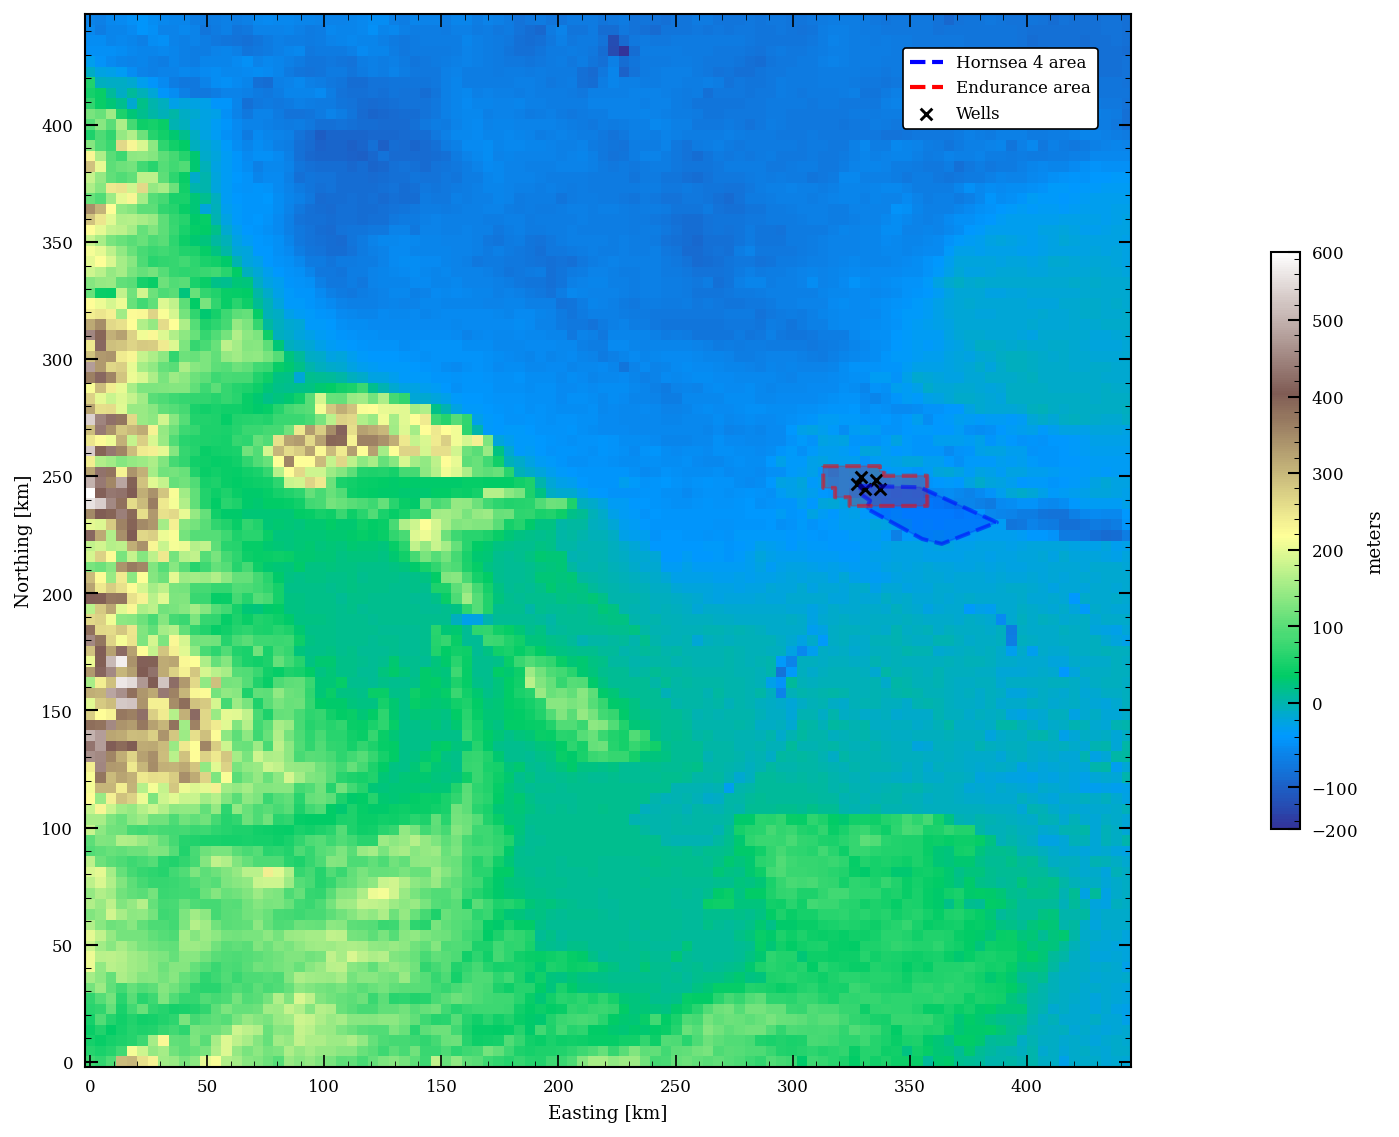

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))

norm = FixPointNormalize(sealevel=0, vmin=np.nanmin(topo_data), vmax=np.nanmax(topo_data))
im = xr.plot.imshow(
    topo_data, cmap='terrain', x='E', y='N', #xlim=(local_lon_min, local_lon_max), ylim=(local_lat_min, local_lat_max),
    norm=norm, vmin=np.nanmin(topo_data), vmax=np.nanmax(topo_data),
    add_colorbar=False)

ax.plot(hornsea_4_xy[:, 0], hornsea_4_xy[:, 1], color='blue', linewidth=2, alpha=0.5, linestyle='--')
ax.fill(hornsea_4_xy[:, 0], hornsea_4_xy[:, 1], color='blue', alpha=0.2)
ax.plot([], [], color='blue', linewidth=2, alpha=1.0, linestyle='--', label='Hornsea 4 area')


ax.plot(endurance_area_xy[:, 0], endurance_area_xy[:, 1], color='red', linewidth=2, alpha=0.5, linestyle='--')
ax.fill(endurance_area_xy[:, 0], endurance_area_xy[:, 1], color='red', alpha=0.2,)
ax.plot([], [], color='red', linewidth=2, alpha=1.0, linestyle='--', label='Endurance area')

ax.scatter(
    well_coords_xy[:, 0], well_coords_xy[:, 1],
    marker='x', color='black', label='Wells')

# ax.set_xticks(ax.get_xticks())
# ax.set_yticks(ax.get_yticks())

ax.set_xticklabels([f'{x/1000:.0f}' for x in ax.get_xticks()])
ax.set_yticklabels([f'{y/1000:.0f}' for y in ax.get_yticks()])

ax.set_xlabel('Easting [km]')
ax.set_ylabel('Northing [km]')

ax.set_aspect('equal', 'box')

legend = ax.legend(loc='upper right', frameon=True, facecolor='white')

fig.colorbar(im, label='meters', shrink=0.5, ax=ax, pad=0.1)

plt.show()

In [22]:
prior_weights    = torch.ones(well_coords_xy.shape[0]).float()
prior_means      = torch.from_numpy(well_coords_xy).float()
prior_covariance = torch.eye(prior_means.shape[1]).expand(prior_means.shape[0], -1, -1) * torch.tensor([5e3, 5e3, 5e2])**2

prior_dist = zuko.distributions.Mixture(dist.MultivariateNormal(
    loc=prior_means, covariance_matrix=prior_covariance), prior_weights)

prior_samples_test = prior_dist.sample((1000,))

In [23]:
# plt.scatter(
#     prior_samples_test[:, 0], prior_samples_test[:, 1],
#     marker='x', color='blue', label='Wells', s=10)

# plt.show()

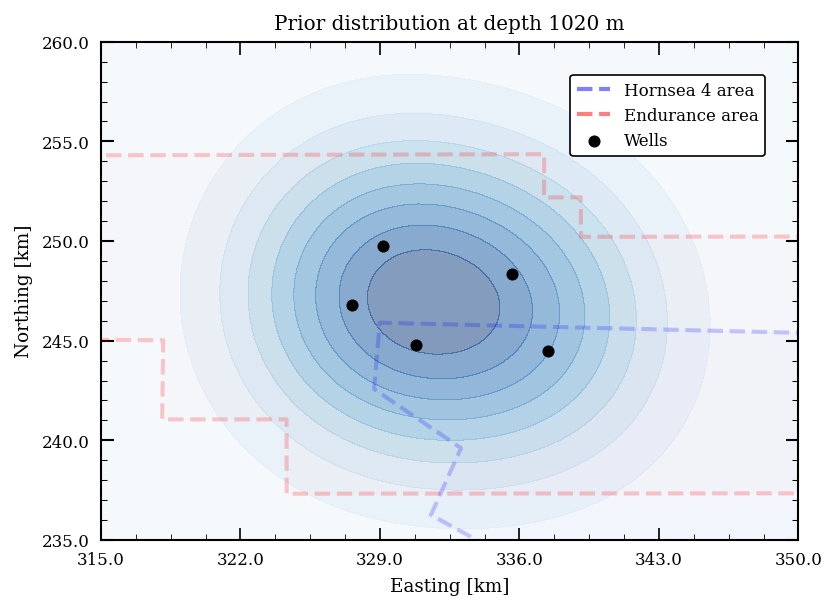

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))

local_x_min = 315_000
local_x_max = 350_000
local_y_min = 235_000
local_y_max = 260_000

p_grid_X, p_grid_Y = torch.meshgrid(torch.linspace(local_x_min, local_x_max, 100), torch.linspace(local_y_min, local_y_max, 100), indexing='ij')
p_grid = torch.stack([p_grid_X, p_grid_Y, torch.ones_like(p_grid_X)*-1020], axis=-1)
p_prior = prior_dist.log_prob(p_grid).exp().numpy()

ax.contourf(p_grid_X, p_grid_Y, p_prior, levels=10, cmap='Blues', alpha=0.5, zorder=0)

ax.plot(hornsea_4_xy[:, 0], hornsea_4_xy[:, 1], color='blue', linewidth=2, alpha=0.2, linestyle='--')
ax.fill(hornsea_4_xy[:, 0], hornsea_4_xy[:, 1], color='blue', alpha=0.01)
ax.plot([], [], color='blue', linewidth=2, alpha=0.5, linestyle='--', label='Hornsea 4 area')


ax.plot(endurance_area_xy[:, 0], endurance_area_xy[:, 1], color='red', linewidth=2, alpha=0.2, linestyle='--')
ax.fill(endurance_area_xy[:, 0], endurance_area_xy[:, 1], color='red', alpha=0.01,)
ax.plot([], [], color='red', linewidth=2, alpha=0.5, linestyle='--', label='Endurance area')

ax.scatter(
    well_coords_xy[:, 0], well_coords_xy[:, 1],
    marker='.', color='black', label='Wells', s=100)

# ax.scatter(
#     prior_samples_test[:, 0], prior_samples_test[:, 1],
#     marker='x', color='blue', label='Wells', s=10)

ax.set_xlim((local_x_min, local_x_max))
ax.set_ylim((local_y_min, local_y_max))

ax.set_xticks(np.linspace(local_x_min, local_x_max, 6))
ax.set_yticks(np.linspace(local_y_min, local_y_max, 6))

ax.set_xticklabels([f'{x/1000:.1f}' for x in np.linspace(local_x_min, local_x_max, 6)])
ax.set_yticklabels([f'{y/1000:.1f}' for y in np.linspace(local_y_min, local_y_max, 6)])

ax.set_xlabel('Easting [km]')
ax.set_ylabel('Northing [km]')

ax.set_aspect('equal', 'box')

ax.set_title('Prior distribution at depth 1020 m')

legend = ax.legend(loc='upper right', frameon=True, facecolor='white')

# fig.colorbar(im, label='meters', shrink=0.5, ax=ax, pad=0.1)

plt.show()

# Neural Eikonal Solver

In [25]:
import tensorflow as tf

tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

import NES

x = seimic3Dmodel['x'].data
y = seimic3Dmodel['y'].data
z = seimic3Dmodel['z'].data


Vel = NES.Interpolator(seimic3Dmodel['vp'].data, x, y, z)

2023-08-30 11:18:18.720190: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
# Initialization
import tensorflow as tf
from tqdm.keras import TqdmCallback

Eik = NES.NES_TP(velocity=Vel, # velocity model (see NES.Interpolator)
                #  eikonal=eikonal # optional, by default isotropic eikonal equation
                 )

Eik.build_model(
    nl=5, # number of layers
    nu=100, # number of units (may be a list)
    act='ad-gauss-1', # acivation funciton ('ad' means adaptive, '1' means slope scale)
    out_act='ad-sigmoid-1', # output activation, 'sigmoid' stands for improved factorization
    input_scale=True, # inputs scaling
    factored=True, # factorization
    out_vscale=True, # constraining by the slowest and the fastest solutions
    reciprocity=True, # symmetrizaion for the reciprocity principle 
    )

Eik.compile(
    optimizer=None, # optimizer can be set manually
    loss='mae', # loss function
    lr=0.003, # learning rate for Adam optimizer
    decay=0.0005 # decay rate for Adam optimizer
    )

In [27]:
filepath_eikonal_nn = 'NES-TP_Model_endurance'

if os.path.exists(filepath_eikonal_nn):
    Eik = NES.NES_TP.load(filepath_eikonal_nn)
else:
    num_pts = 50000
    h = Eik.train(
        x_train=num_pts, # number of random colocation points for training
        tolerance=2e-3, # tolerance value for early stopping (expected error with 2nd-order f-FMM)
        epochs=1000,
        verbose=0,
        callbacks=[TqdmCallback(verbose=0, miniters=10, mininterval=5)], # progress bar
        batch_size=int(num_pts/4),
    )
    
    plt.plot(h.history['loss'])
    plt.yscale('log')
    plt.show()
    
    Eik.save(filepath_eikonal_nn, # path and filename which defines the folder with saved model
            save_optimizer=False, # optimizer state can be saved to continue training
            training_data=False) # training data can be saved

Loaded model from "NES-TP_Model_endurance"


# Test Inversion

In [28]:
receivers_latlon = seismic_inventory.to_numpy()

receivers_xy = latlong2xy(receivers_latlon[:, 0], receivers_latlon[:, 1], topo_data)
receivers_xy = torch.from_numpy(np.hstack([receivers_xy, receivers_latlon[:, 2].reshape(-1, 1)]))

In [29]:
true_event = torch.tensor([335.0, 245.0, -1.02]) *1e3

In [30]:
N_grid_posterior = 100

x_post = torch.linspace(local_x_min, local_x_max, N_grid_posterior)
y_post = torch.linspace(local_y_min, local_y_max, N_grid_posterior)
z_post = torch.linspace(z_min, z_max, N_grid_posterior)

def data_likelihood(samples, design=None):    
    std_data = 0.5
    return dist.Independent(dist.Normal(samples, torch.tensor(std_data)), 1)

def prepare_input_data(model_samples, receivers):
    inp_indices = np.indices((model_samples.shape[0], receivers.shape[0])).reshape(2, -1).T
    inp = np.hstack((model_samples[inp_indices[:,0]], receivers[inp_indices[:,1]]))
    
    return inp

inp = prepare_input_data(true_event.unsqueeze(0), receivers_xy)
tt_obs = torch.from_numpy(Eik.Traveltime(inp, verbose=0))

def gridsearch_posterior(tt_obs, x, y, z, design, eikonal_nn, prior_dist):

    p_posterior_X, p_posterior_Y, p_posterior_Z = torch.meshgrid(x, y, z, indexing='ij')
    posterior_grid = torch.stack([p_posterior_X, p_posterior_Y, p_posterior_Z], axis=-1)
    posterior_grid_flat = posterior_grid.flatten(end_dim=-2)

    inp = prepare_input_data(posterior_grid_flat, design[:, :3])

    posterior_tt = torch.from_numpy(eikonal_nn.Traveltime(inp, verbose=0))
    posterior_tt = posterior_tt.reshape(posterior_grid.shape[0], posterior_grid.shape[1], posterior_grid.shape[2], design.shape[0])
    
    p_likelihood = data_likelihood(posterior_tt, design).log_prob(tt_obs)
    
    p_prior = prior_dist.log_prob(posterior_grid)

    p_unnormalised_posterior = p_likelihood + p_prior
    
    p_evidence = torch.logsumexp(p_unnormalised_posterior, dim=(0,1,2))

    p_posterior = p_unnormalised_posterior - p_evidence
    
    return p_posterior, p_prior, p_posterior_X, p_posterior_Y, p_posterior_Z

p_posterior, p_prior, p_posterior_X, p_posterior_Y, p_posterior_Z = gridsearch_posterior(tt_obs, x_post, y_post, z_post, receivers_xy, Eik, prior_dist)

-412.04819277108425


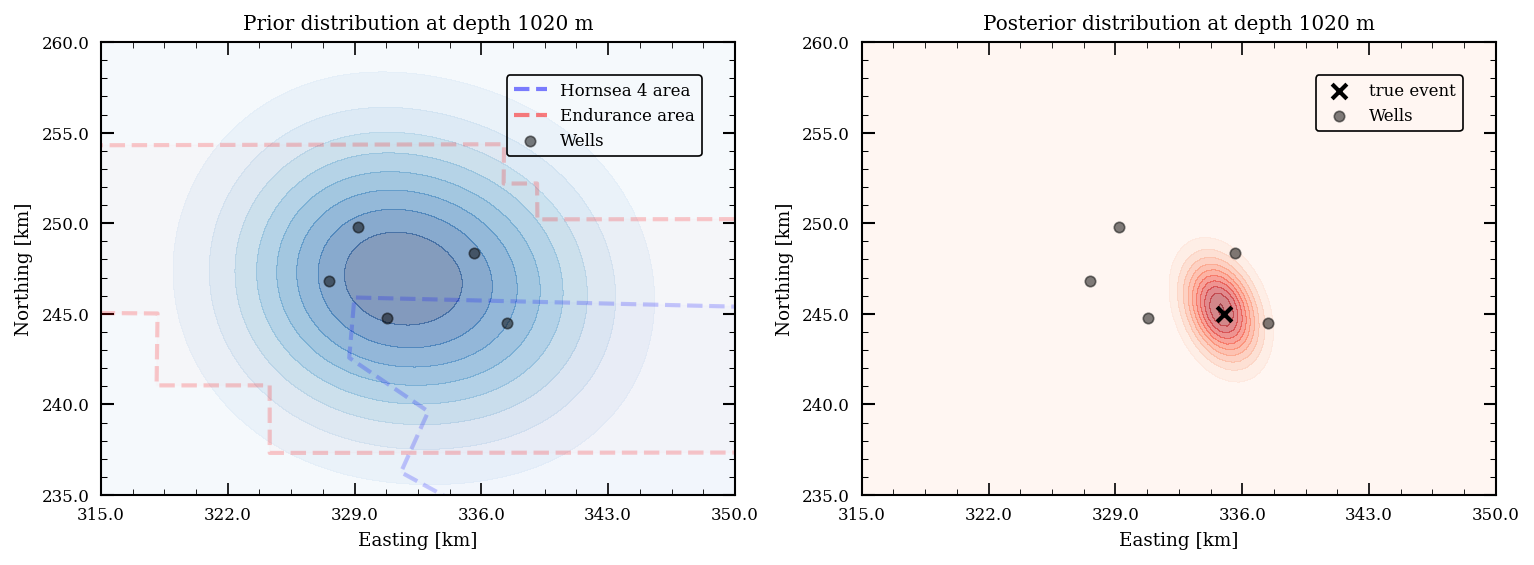

In [31]:
z_index = 20

print(z[z_index])

fig, ax_dict = plt.subplot_mosaic([['a', 'b']], figsize=(12, 6))

ax = ax_dict['a']

ax.contourf(
    p_posterior_X[:, :, z_index], p_posterior_Y[:, :, z_index], p_prior[:, :, z_index].exp(),
    levels=10, cmap='Blues', alpha=0.5, zorder=0)
ax.set_title('Prior distribution at depth 1020 m')

ax.plot(hornsea_4_xy[:, 0], hornsea_4_xy[:, 1], color='blue', linewidth=2, alpha=0.2, linestyle='--')
ax.fill(hornsea_4_xy[:, 0], hornsea_4_xy[:, 1], color='blue', alpha=0.01)
ax.plot([], [], color='blue', linewidth=2, alpha=0.5, linestyle='--', label='Hornsea 4 area')


ax.plot(endurance_area_xy[:, 0], endurance_area_xy[:, 1], color='red', linewidth=2, alpha=0.2, linestyle='--')
ax.fill(endurance_area_xy[:, 0], endurance_area_xy[:, 1], color='red', alpha=0.01,)
ax.plot([], [], color='red', linewidth=2, alpha=0.5, linestyle='--', label='Endurance area')

ax = ax_dict['b']

cf = ax.contourf(
    p_posterior_X[:, :, z_index], p_posterior_Y[:, :, z_index], p_posterior[:, :, z_index].exp(),
    levels=10, cmap='Reds', alpha=0.5, zorder=0)
ax.set_title('Posterior distribution at depth 1020 m')

ax.scatter(
    true_event[0], true_event[1],
    marker='x', color='black', label='true event', s=50, linewidth=2)


for ax in ax_dict.values():
    
    ax.scatter(
        well_coords_xy[:, 0], well_coords_xy[:, 1], alpha=0.5,
        marker='.', color='black', label='Wells', s=100)

    ax.set_xlim((local_x_min, local_x_max))
    ax.set_ylim((local_y_min, local_y_max))

    ax.set_xticks(np.linspace(local_x_min, local_x_max, 6))
    ax.set_yticks(np.linspace(local_y_min, local_y_max, 6))

    ax.set_xticklabels([f'{x/1000:.1f}' for x in np.linspace(local_x_min, local_x_max, 6)])
    ax.set_yticklabels([f'{y/1000:.1f}' for y in np.linspace(local_y_min, local_y_max, 6)])

    ax.set_xlabel('Easting [km]')
    ax.set_ylabel('Northing [km]')

    ax.set_aspect('equal', 'box')

    ax.legend(loc='upper right')

plt.show()

tensor(335.1515)


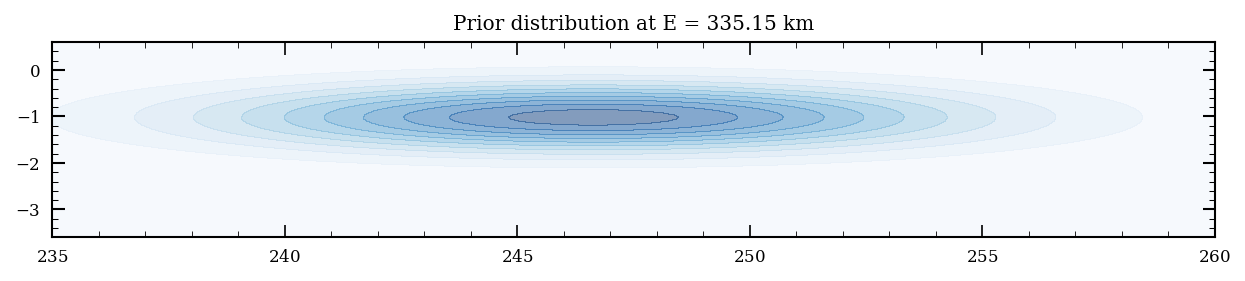

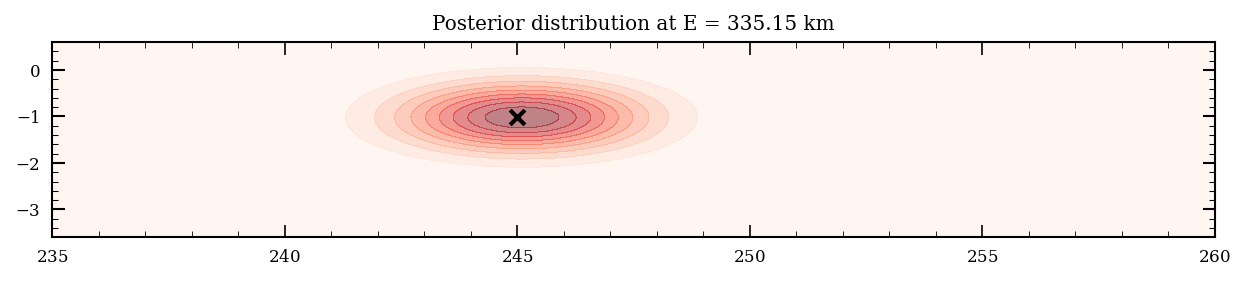

In [32]:
x_index = torch.argmin(torch.abs(torch.linspace(local_x_min, local_x_max, N_grid_posterior) - true_event[0]))

print(torch.linspace(local_x_min, local_x_max, N_grid_posterior)[x_index]/1e3)

fig, ax = plt.subplots(figsize=(10, 10))

ax.contourf(p_posterior_Y[x_index, :, :]/1000, p_posterior_Z[x_index, :, :]/1000, p_prior[x_index, :, :].exp(),
    levels=10, cmap='Blues', alpha=0.5, zorder=0)

ax.set_aspect('equal')

ax.set_title('Prior distribution at E = {:.2f} km'.format(torch.linspace(local_x_min, local_x_max, N_grid_posterior)[x_index]/1e3))

plt.show()

fig, ax = plt.subplots(figsize=(10, 10))

# ax.imshow(
#     p_posterior[x_index, :, :].exp().T, extent=[local_y_min/1e3, local_y_max/1e3, z_min/1e3, z_max/1e3],
#     origin='lower', cmap='Reds', alpha=0.5, zorder=0)

ax.contourf(p_posterior_Y[x_index, :, :]/1000, p_posterior_Z[x_index, :, :]/1000, p_posterior[x_index, :, :].exp(),
    levels=10, cmap='Reds', alpha=0.5, zorder=0)

ax.scatter(
    true_event[1]/1000, true_event[2]/1000,
    marker='x', color='black', label='true event', s=50, linewidth=2)    

ax.set_aspect('equal')

ax.set_title('Posterior distribution at E = {:.2f} km'.format(torch.linspace(local_x_min, local_x_max, N_grid_posterior)[x_index]/1e3))

plt.show()

## Effect of including seismometer in Boulby Mine

In [33]:
mine_latlon = np.array([landmarks['lat']['Boulby Mine'], landmarks['lon']['Boulby Mine']])[None, :]
mine_xy = latlong2xy(mine_latlon[:, 0], mine_latlon[:, 1], topo_data)

mine_depth = -1400
mine_xy = np.array([mine_xy[0, 0], mine_xy[0, 1], mine_depth])

receivers_mine_xy = np.vstack([mine_xy, receivers_xy])

In [34]:
inp = prepare_input_data(true_event.unsqueeze(0), receivers_mine_xy)
tt_obs = torch.from_numpy(Eik.Traveltime(inp, verbose=0))

p_posterior, p_prior, p_posterior_X, p_posterior_Y, p_posterior_Z = gridsearch_posterior(tt_obs, x_post, y_post, z_post, receivers_mine_xy, Eik, prior_dist)

-412.04819277108425


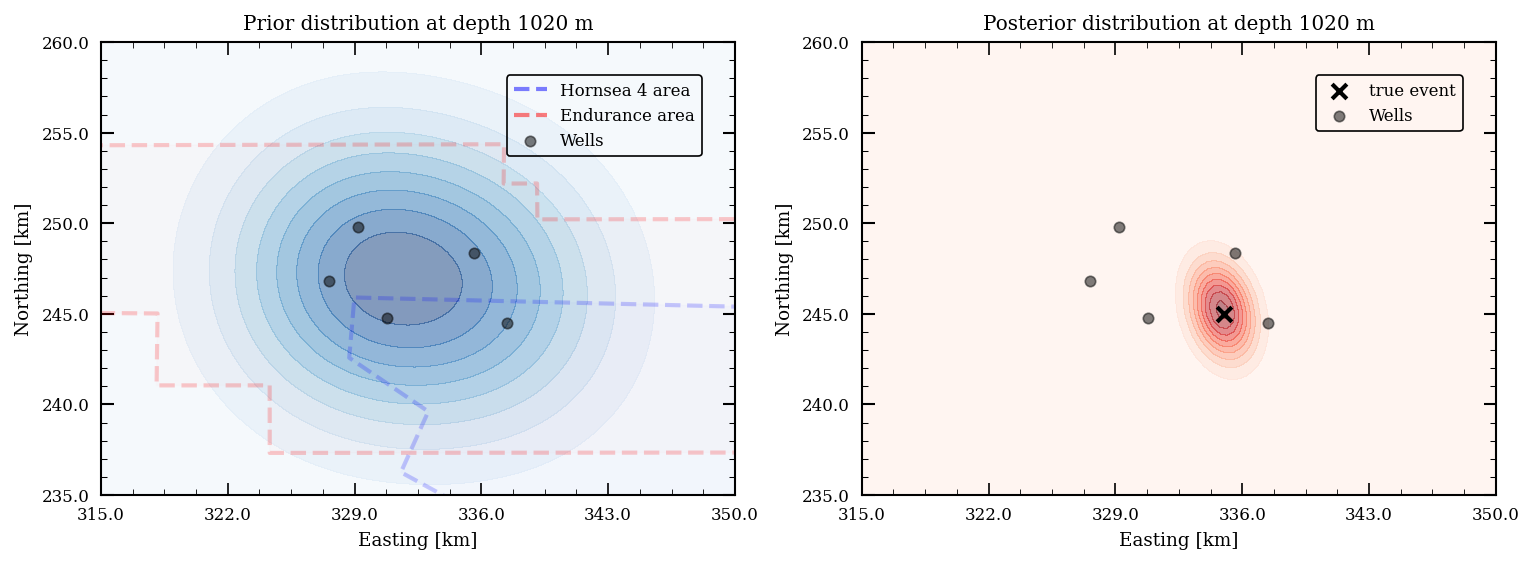

In [35]:
z_index = 20

print(z[z_index])

fig, ax_dict = plt.subplot_mosaic([['a', 'b']], figsize=(12, 6))

ax = ax_dict['a']

ax.contourf(
    p_posterior_X[:, :, z_index], p_posterior_Y[:, :, z_index], p_prior[:, :, z_index].exp(),
    levels=10, cmap='Blues', alpha=0.5, zorder=0)
ax.set_title('Prior distribution at depth 1020 m')

ax.plot(hornsea_4_xy[:, 0], hornsea_4_xy[:, 1], color='blue', linewidth=2, alpha=0.2, linestyle='--')
ax.fill(hornsea_4_xy[:, 0], hornsea_4_xy[:, 1], color='blue', alpha=0.01)
ax.plot([], [], color='blue', linewidth=2, alpha=0.5, linestyle='--', label='Hornsea 4 area')


ax.plot(endurance_area_xy[:, 0], endurance_area_xy[:, 1], color='red', linewidth=2, alpha=0.2, linestyle='--')
ax.fill(endurance_area_xy[:, 0], endurance_area_xy[:, 1], color='red', alpha=0.01,)
ax.plot([], [], color='red', linewidth=2, alpha=0.5, linestyle='--', label='Endurance area')

ax = ax_dict['b']

cf = ax.contourf(
    p_posterior_X[:, :, z_index], p_posterior_Y[:, :, z_index], p_posterior[:, :, z_index].exp(),
    levels=10, cmap='Reds', alpha=0.5, zorder=0)
ax.set_title('Posterior distribution at depth 1020 m')

ax.scatter(
    true_event[0], true_event[1],
    marker='x', color='black', label='true event', s=50, linewidth=2)


for ax in ax_dict.values():
    
    ax.scatter(
        well_coords_xy[:, 0], well_coords_xy[:, 1], alpha=0.5,
        marker='.', color='black', label='Wells', s=100)

    ax.set_xlim((local_x_min, local_x_max))
    ax.set_ylim((local_y_min, local_y_max))

    ax.set_xticks(np.linspace(local_x_min, local_x_max, 6))
    ax.set_yticks(np.linspace(local_y_min, local_y_max, 6))

    ax.set_xticklabels([f'{x/1000:.1f}' for x in np.linspace(local_x_min, local_x_max, 6)])
    ax.set_yticklabels([f'{y/1000:.1f}' for y in np.linspace(local_y_min, local_y_max, 6)])

    ax.set_xlabel('Easting [km]')
    ax.set_ylabel('Northing [km]')

    ax.set_aspect('equal', 'box')

    ax.legend(loc='upper right')

plt.show()

tensor(335.1515)


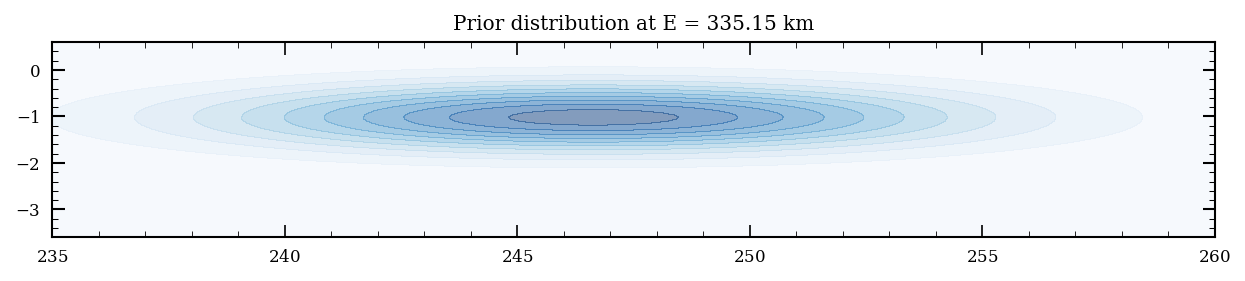

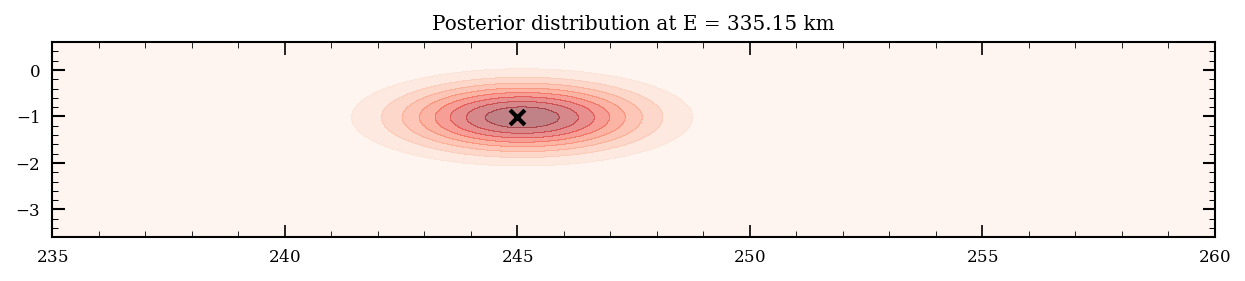

In [36]:
x_index = torch.argmin(torch.abs(torch.linspace(local_x_min, local_x_max, N_grid_posterior) - true_event[0]))

print(torch.linspace(local_x_min, local_x_max, N_grid_posterior)[x_index]/1e3)

fig, ax = plt.subplots(figsize=(10, 10))

ax.contourf(p_posterior_Y[x_index, :, :]/1000, p_posterior_Z[x_index, :, :]/1000, p_prior[x_index, :, :].exp(),
    levels=10, cmap='Blues', alpha=0.5, zorder=0)

ax.set_aspect('equal')

ax.set_title('Prior distribution at E = {:.2f} km'.format(torch.linspace(local_x_min, local_x_max, N_grid_posterior)[x_index]/1e3))

plt.show()

fig, ax = plt.subplots(figsize=(10, 10))

# ax.imshow(
#     p_posterior[x_index, :, :].exp().T, extent=[local_y_min/1e3, local_y_max/1e3, z_min/1e3, z_max/1e3],
#     origin='lower', cmap='Reds', alpha=0.5, zorder=0)

ax.contourf(p_posterior_Y[x_index, :, :]/1000, p_posterior_Z[x_index, :, :]/1000, p_posterior[x_index, :, :].exp(),
    levels=10, cmap='Reds', alpha=0.5, zorder=0)

ax.scatter(
    true_event[1]/1000, true_event[2]/1000,
    marker='x', color='black', label='true event', s=50, linewidth=2)    

ax.set_aspect('equal')

ax.set_title('Posterior distribution at E = {:.2f} km'.format(torch.linspace(local_x_min, local_x_max, N_grid_posterior)[x_index]/1e3))

plt.show()

# Optimal Design

In [37]:

class Endurance_Traveltimes:
    def __init__(self, eikonal_nn_path, topo_data):
        self.topo_data = topo_data
        self.eikonal_nn_path = eikonal_nn_path
        self.eikonal_nn = None

    def _load_eikonal(self):
        if self.eikonal_nn is None:
            with open(os.devnull, "w") as f, contextlib.redirect_stdout(f): # suppress print
                self.eikonal_nn = NES.NES_TP.load(self.eikonal_nn_path)
        else:
            pass
        
    def _discard_eikonal(self):
        del self.eikonal_nn
        self.eikonal_nn = None

    def forward(self, design, model_samples, **kwargs):
        
        self._load_eikonal()
                
        inp = self._prepare_input(design, model_samples)
        out = self.eikonal_nn.Traveltime(inp, verbose=0)
        
        out = out.reshape(model_samples.shape[0], design.shape[0])
        
        self._discard_eikonal()
        
        return torch.from_numpy(out)
    
    def hessian(self, design, model_samples, **kwargs):

        self._load_eikonal()
        
        inp = self._prepare_input(design, model_samples)
        out_flat = self.eikonal_nn.HessianS(inp, verbose=0)
                
        out_flat = out_flat.reshape(model_samples.shape[0], design.shape[0], model_samples.shape[-1]*2)
                
        out = np.zeros((model_samples.shape[0], design.shape[0], 3, 3))
        out[..., np.triu_indices(3)[0], np.triu_indices(3)[1]] = out_flat
        out[..., np.tril_indices(3)[0], np.tril_indices(3)[1]] = out_flat
        
        self._discard_eikonal()
        
        return torch.from_numpy(out)
    
    def jacobian(self, design, model_samples,  **kwargs):
        
        self._load_eikonal()

        inp = self._prepare_input(design, model_samples)
        out_flat = self.eikonal_nn.GradientS(inp, verbose=0)
        out = out_flat.reshape(model_samples.shape[0], design.shape[0], model_samples.shape[-1])
        
        self._discard_eikonal()
        
        return torch.from_numpy(out)
    
    def _prepare_input(self, design, model_samples, **kwargs):
        
        receivers = design[:, :3]
        
        inp_indices = np.indices((model_samples.shape[0], receivers.shape[0])).reshape(2, -1).T
        inp = np.hstack((model_samples[inp_indices[:,0]], receivers[inp_indices[:,1]]))
        
        return inp
    


In [38]:
def data_likelihood(samples, design=None, **kwargs):    
    std_data = 0.5
    return dist.Independent(dist.Normal(samples, torch.tensor(std_data)), 1)

In [39]:
from geobed.continuous.core import BED_Class

filepath = 'data/Endurance_CCS/Endurance_CCS_StudyArea.shp'

Forward_Class = Endurance_Traveltimes(filepath_eikonal_nn, topo_data)

Test_BED_Class = BED_Class(
    forward_function=Forward_Class,
    obs_noise_dist=data_likelihood,
    m_prior_dist=prior_dist,
    # model_parameter_prior_samples=,
    # nuisance_parameter_dist=,
    # nuisance_parameter_samples=nuisance_parameter_samples,
    )

In [40]:
n_visual_model_samples = int(1e4)

design_list = torch.from_numpy(receivers_mine_xy).unsqueeze(1)

clean_data = Test_BED_Class.get_forward_function_samples(
    design_list.squeeze(),
    n_samples_model=n_visual_model_samples,
    n_samples_nuisance=1,
    random_seed_model=1,
    random_seed_nuisance=2,
    ).squeeze()

noisy_data = Test_BED_Class.get_forward_model_samples(
    design_list.squeeze(),
    n_samples_model=n_visual_model_samples,
    n_samples_nuisance=1,
    random_seed_model=1,
    random_seed_nuisance=2,
    ).squeeze() 

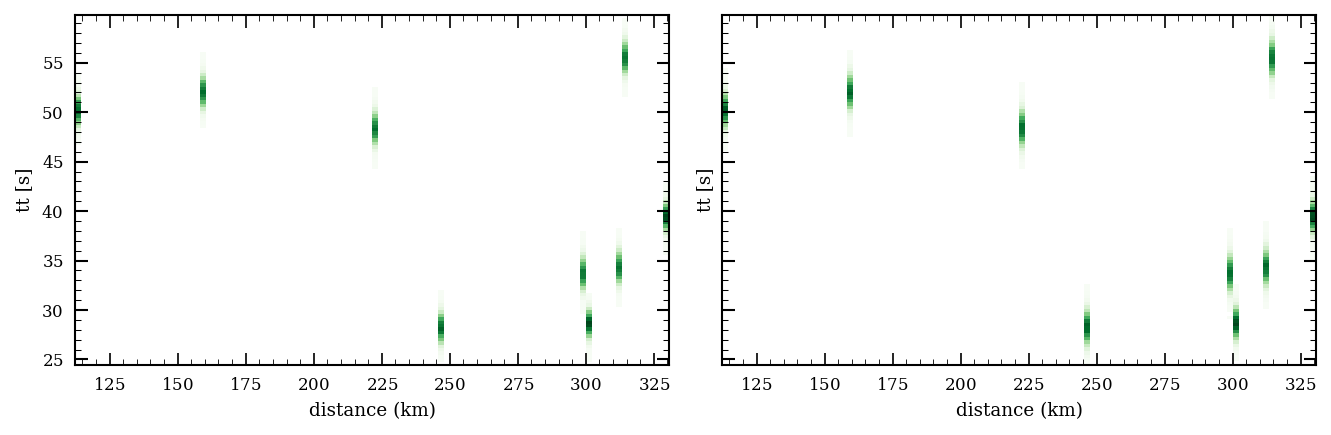

In [41]:
# with style.context('./mpl_stylesheet.mplstyle'):
fig = plt.figure(figsize=(9, 3))
ax_dict = fig.subplot_mosaic(
    '''ab''',
    # gridspec_kw={'wspace': 0.2},
    sharex=True, sharey=True)

ax_dict['a'].hist2d(
    np.sqrt(design_list.squeeze()[:, 1].expand(n_visual_model_samples, -1).flatten().numpy()**2 + \
    design_list.squeeze()[:, 0].expand(n_visual_model_samples, -1).flatten().numpy()**2)/1e3,
    clean_data.flatten().numpy(),
    bins=[100, 100], cmap='Greens', cmin=1)

ax_dict['b'].hist2d(
    np.sqrt(design_list.squeeze()[:, 1].expand(n_visual_model_samples, -1).flatten().numpy()**2 + \
    design_list.squeeze()[:, 0].expand(n_visual_model_samples, -1).flatten().numpy()**2)/1e3,
    noisy_data.flatten().numpy(),
    bins=[100, 100], cmap='Greens', cmin=1)
    
ax_dict['a'].set_ylabel('tt [s]')
ax_dict['b'].set_ylabel('tt [s]')

ax_dict['a'].set_xlabel('distance (km)')
ax_dict['b'].set_xlabel('distance (km)')

plt.tight_layout()
plt.show()

In [42]:
filepath = 'data/Endurance_CCS/Endurance_CCS_StudyArea.shp'

Forward_Class = Endurance_Traveltimes(filepath_eikonal_nn, topo_data)


def data_likelihood(samples, design=None, **kwargs):  
    
    cov_matrix = torch.eye(samples.shape[-1]) * design[:, -1]

    return dist.MultivariateNormal(samples, covariance_matrix=cov_matrix)


Test_BED_Class = BED_Class(
    forward_function=Forward_Class,
    obs_noise_dist=data_likelihood,
    m_prior_dist=prior_dist,
    # model_parameter_prior_samples=,
    # nuisance_parameter_dist=,
    # nuisance_parameter_samples=nuisance_parameter_samples,
    )

In [43]:
seismometer_noise_level = 0.5

mine_relative_noise_level = np.logspace(2, -4, 21)

design_list = []

for nl_i in mine_relative_noise_level:

    design_i = torch.from_numpy(receivers_mine_xy)
    # add column with noiselevel

    std_array = torch.ones(design_i.shape[0], 1) * seismometer_noise_level
    std_array[0] *= nl_i

    design_i = torch.cat((design_i, std_array), dim=1)
    
    design_list.append(design_i)
    
design_list = torch.stack(design_list).float()

print(design_list.dtype)

torch.float32


In [44]:
prior_samples_test = prior_dist.sample((int(1e6),))

print(prior_samples_test.shape)

torch.Size([1000000, 3])


In [45]:
def nmc_partition(T):
    M = math.pow(T, 1/3)
    N = M*M
    return int(N), int(M)

T = int(1e4)
N, M = nmc_partition(T)

eig_nmc, out_nmc = Test_BED_Class.calculate_EIG(
    design=design_list,
    eig_method='NMC',
    eig_method_kwargs={
        'N': T,
        # 'M': M,
        'reuse_M':True,
        'memory_efficient':False},
    num_workers=10,
    # parallel_library='joblib',
    random_seed=1,
    filename='data/endurance_first_tests_eig_nmc',
)

In [46]:
T = int(1e4)

eig_dn, out_dn = Test_BED_Class.calculate_EIG(
    design=design_list,
    eig_method='DN',
    eig_method_kwargs={'N': T, },
    num_workers=10,
    # parallel_library='joblib',
    random_seed=1,
    filename='data/endurance_first_tests_eig_dn',
)

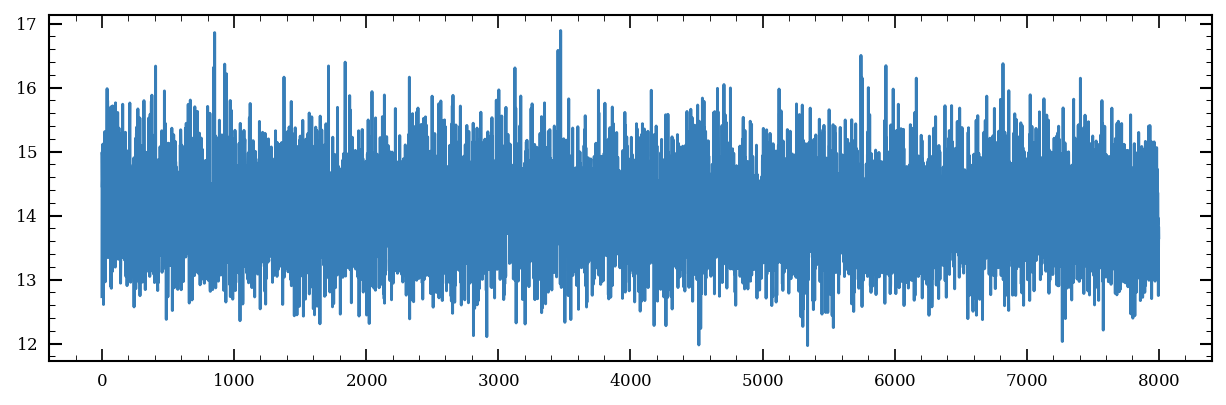

In [47]:
from geobed.discrete.guides import GMM_guide

T = int(1e5)
N = int(0.2*T)
M = int(0.8*T)

n_batch = 10
n_epochs = 1

scheduler = torch.optim.lr_scheduler.ExponentialLR
max_lr = 1e-2
min_lr = 1e-4
gamma  = (min_lr/max_lr)**(n_batch/(n_epochs*M))

eig_varmarg, out_varmarg = Test_BED_Class.calculate_EIG(
    design=design_list,
    eig_method='variational_marginal',
    eig_method_kwargs=
        {'guide': GMM_guide,
        'N': N,
        'M': M,
        'guide_kwargs': {'components':10, 'init_method': {'init_params': 'k-means++', 'n_init': 10, 'max_iter': 1}},
        'n_batch': n_batch,
        'n_epochs': n_epochs,
        # 'optimizer': None,
        'optimizer_kwargs': {'lr': max_lr},
        'scheduler': scheduler,
        'scheduler_kwargs': {'gamma':gamma, 'verbose':False},
        'return_guide': True,
        'return_train_loss': True,
        'return_test_loss': True,
        },
    num_workers=10,
    parallel_library='joblib',
    random_seed=1,
    filename='data/endurance_first_tests_eig_varmarg',
)

plt.figure(figsize=(10, 3))
plt.plot(out_varmarg[0]['train_loss'], label='train loss')
plt.show()

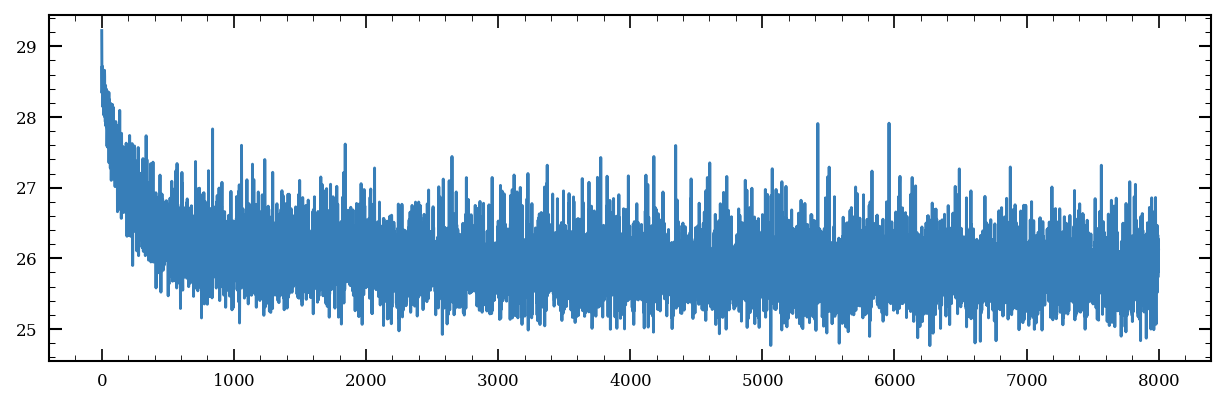

In [48]:
from geobed.discrete.guides import MDN_guide

T = int(1e5)
N = int(0.2*T)
M = int(0.8*T)

n_batch = 10
n_epochs = 1

scheduler = torch.optim.lr_scheduler.ExponentialLR
max_lr = 1e-4
min_lr = 1e-6
gamma  = (min_lr/max_lr)**(n_batch/(n_epochs*M))

eig_varpost, out_varpost = Test_BED_Class.calculate_EIG(
    design=design_list,
    eig_method='variational_posterior',
    eig_method_kwargs=
        {'guide': MDN_guide,
        'N': N,
        'M': M,
        'guide_kwargs': {'components':20, 'hidden_features':[200, 200, 200], 'normalize':True},
        'n_batch': n_batch,
        'n_epochs': n_epochs,
        # 'optimizer': None,
        'optimizer_kwargs': {'lr': max_lr},
        'scheduler': scheduler,
        'scheduler_kwargs': {'gamma':gamma, 'verbose':False},
        'return_guide': True,
        'return_train_loss': True,
        'return_test_loss': True,
        },
    num_workers=10,
    parallel_library='joblib',
    random_seed=1,
    filename='data/endurance_first_tests_eig_varpost',
)

plt.figure(figsize=(10, 3))
plt.plot(out_varpost[0]['train_loss'], label='train loss')
plt.show()

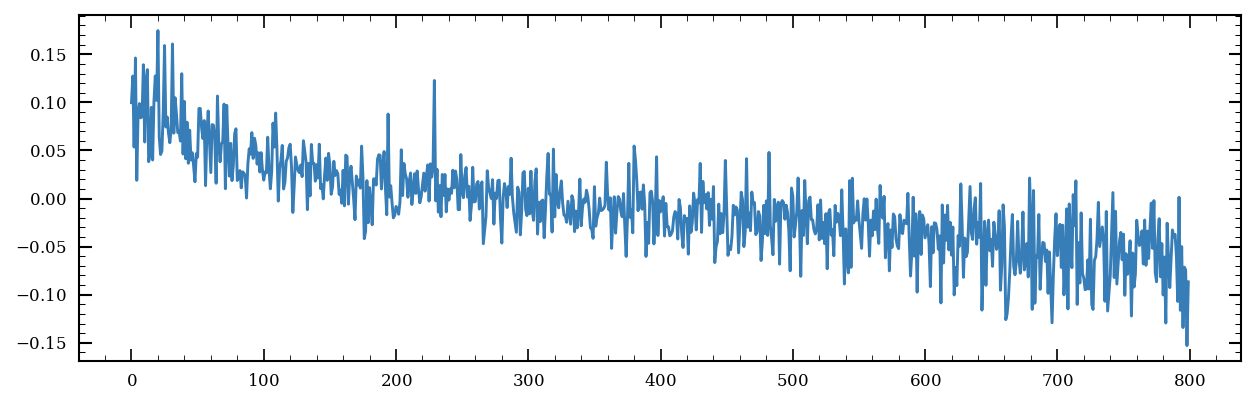

In [49]:
from geobed.discrete.guides import MLP_FLO

T = int(1e4)
N = int(0.2*T)
M = int(0.8*T)

n_batch = 10
n_epochs = 1

scheduler = torch.optim.lr_scheduler.ExponentialLR
max_lr = 1e-4
min_lr = 1e-6
gamma  = (min_lr/max_lr)**(n_batch/(n_epochs*M))

eig_FLO, out_FLO = Test_BED_Class.calculate_EIG(
    design=design_list,
    eig_method='FLO',
    eig_method_kwargs=
        {'guide': MLP_FLO,
        'N': N,
        'M': M,
        'K': 'adaptive',
        'guide_kwargs': {'H':[20, 20, 20, 20,],},
        # 'guide_kwargs': {'H':[500, 500, 500, 500],},
        'n_batch': n_batch,
        'n_epochs': n_epochs,
        # 'optimizer': None,
        'optimizer_kwargs': {'lr': max_lr},
        'scheduler': scheduler,
        'scheduler_kwargs': {'gamma':gamma, 'verbose':False},
        'return_guide': True,
        'return_train_loss': True,
        'return_test_loss': True,
        },
    num_workers=10,
    # parallel_library='joblib',
    random_seed=1,
    filename='data/endurance_first_tests_eig_FLO',
)

plt.figure(figsize=(10, 3))
plt.plot(out_FLO[0]['train_loss'], label='train loss')
plt.show()

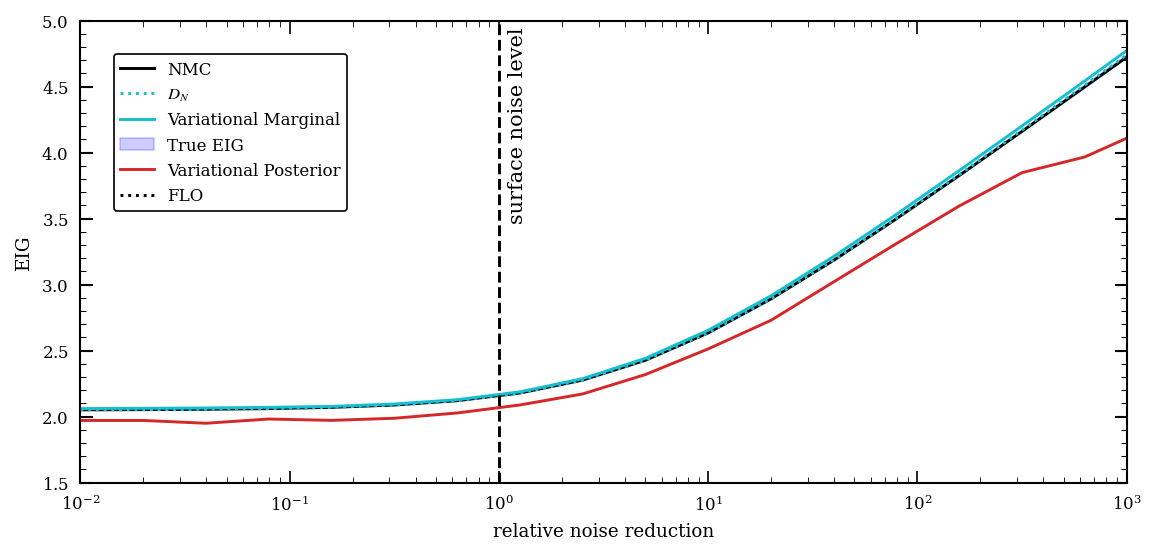

In [50]:
fig, ax = plt.subplots(figsize=(9, 4))

ax.plot(1/mine_relative_noise_level, eig_nmc, label="NMC", color="black", linestyle="-")
ax.plot(1/mine_relative_noise_level, eig_dn, label=r"$D_N$", color="tab:cyan", linestyle=":")
ax.plot(1/mine_relative_noise_level, eig_varmarg, label="Variational Marginal", color="tab:cyan")

ax.fill_between(1/mine_relative_noise_level, eig_nmc, eig_dn, alpha=0.2, color="blue", label='True EIG')

ax.plot(1/mine_relative_noise_level, eig_varpost, label="Variational Posterior", color="tab:red")
ax.plot(1/mine_relative_noise_level, eig_FLO, label="FLO", color="black", linestyle=":")


ax.axvline(1, color="black", linestyle="--")
ax.text(1.1, 3.5, "surface noise level", rotation=90)

ax.set_xlabel("relative noise reduction")
ax.set_ylabel("EIG")

ax.set_xlim(0.01, 1000)
ax.set_ylim(1.5, 5)

ax.set_xscale("log")

ax.legend()

plt.show()

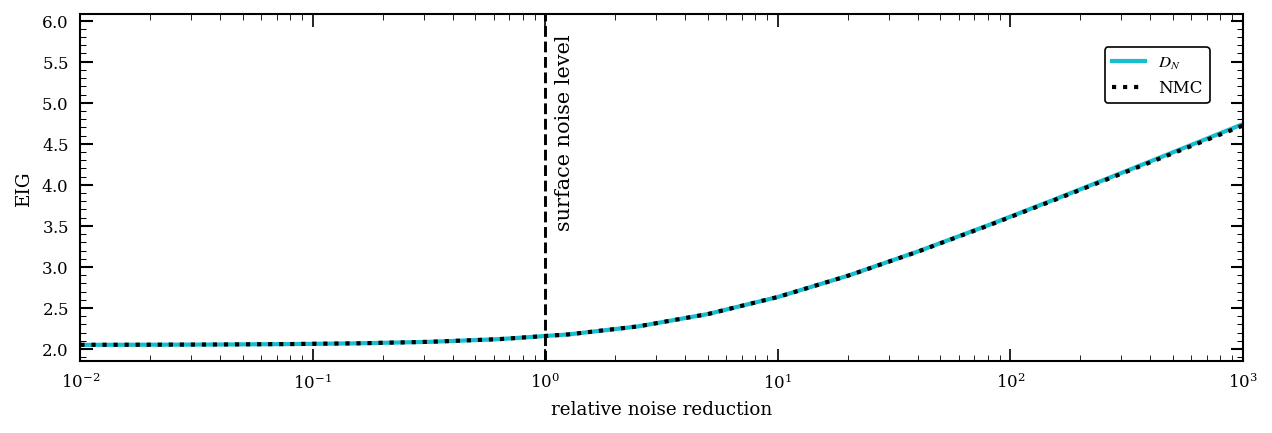

In [54]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)

ax.plot(1/mine_relative_noise_level, eig_dn, label=r"$D_N$", color="tab:cyan", linestyle="-", linewidth=2)
ax.plot(1/mine_relative_noise_level, eig_nmc, label="NMC", color="black", linestyle=":", linewidth=2)
# ax.plot(1/mine_relative_noise_level, eig_varmarg, label="Variational Marginal", color="tab:cyan")

# ax.fill_between(1/mine_relative_noise_level, eig_nmc, eig_dn, alpha=0.2, color="blue", label='True EIG')

# ax.plot(1/mine_relative_noise_level, eig_varpost, label="Variational Posterior", color="tab:red")
# ax.plot(1/mine_relative_noise_level, eig_FLO, label="FLO", color="black", linestyle=":")


ax.axvline(1, color="black", linestyle="--")
ax.text(1.1, 3.5, "surface noise level", rotation=90)

ax.set_xlabel("relative noise reduction")
ax.set_ylabel("EIG")

ax.set_xlim(0.01, 1000)
# ax.set_ylim(1.5, 5)

ax.set_xscale("log")

ax.legend()

plt.show()

In [52]:
# for i, design_noise_i in enumerate(design_list):
    
#     if  i % 4 != 0:
#         continue
    
#     print(mine_relative_noise_level[i])

#     inp = prepare_input_data(true_event.unsqueeze(0), design_noise_i[:, :3])
#     tt_obs = torch.from_numpy(Eik.Traveltime(inp, verbose=0))


#     p_posterior, p_prior, p_posterior_X, p_posterior_Y, p_posterior_Z = gridsearch_posterior(tt_obs, x_post, y_post, z_post, design_noise_i, Eik, prior_dist)


#     z_index = 20

#     print(z[z_index])

#     fig, ax_dict = plt.subplot_mosaic([['a', 'b']], figsize=(12, 5))

#     ax = ax_dict['a']

#     ax.contourf(
#         p_posterior_X[:, :, z_index], p_posterior_Y[:, :, z_index], p_prior[:, :, z_index].exp(),
#         levels=10, cmap='Blues', alpha=0.5, zorder=0)
#     ax.set_title('Prior distribution at depth 1020 m')

#     ax.plot(hornsea_4_xy[:, 0], hornsea_4_xy[:, 1], color='blue', linewidth=2, alpha=0.2, linestyle='--')
#     ax.fill(hornsea_4_xy[:, 0], hornsea_4_xy[:, 1], color='blue', alpha=0.01)
#     ax.plot([], [], color='blue', linewidth=2, alpha=0.5, linestyle='--', label='Hornsea 4 area')


#     ax.plot(endurance_area_xy[:, 0], endurance_area_xy[:, 1], color='red', linewidth=2, alpha=0.2, linestyle='--')
#     ax.fill(endurance_area_xy[:, 0], endurance_area_xy[:, 1], color='red', alpha=0.01,)
#     ax.plot([], [], color='red', linewidth=2, alpha=0.5, linestyle='--', label='Endurance area')

#     ax = ax_dict['b']

#     cf = ax.contourf(
#         p_posterior_X[:, :, z_index], p_posterior_Y[:, :, z_index], p_posterior[:, :, z_index].exp(),
#         levels=10, cmap='Reds', alpha=0.5, zorder=0)
#     ax.set_title('Posterior distribution at depth 1020 m')

#     ax.scatter(
#         true_event[0], true_event[1],
#         marker='x', color='black', label='true event', s=50, linewidth=2)


#     for ax in ax_dict.values():
        
#         ax.scatter(
#             well_coords_xy[:, 0], well_coords_xy[:, 1], alpha=0.5,
#             marker='.', color='black', label='Wells', s=100)

#         ax.set_xlim((local_x_min, local_x_max))
#         ax.set_ylim((local_y_min, local_y_max))

#         ax.set_xticks(np.linspace(local_x_min, local_x_max, 6))
#         ax.set_yticks(np.linspace(local_y_min, local_y_max, 6))

#         ax.set_xticklabels([f'{x/1000:.1f}' for x in np.linspace(local_x_min, local_x_max, 6)])
#         ax.set_yticklabels([f'{y/1000:.1f}' for y in np.linspace(local_y_min, local_y_max, 6)])

#         ax.set_xlabel('Easting [km]')
#         ax.set_ylabel('Northing [km]')

#         ax.set_aspect('equal', 'box')

#         ax.legend(loc='upper right')

#     fig.suptitle(f'Noise level of {mine_relative_noise_level[i]:.5f} in Boulby mine', fontsize=16)

#     fig.tight_layout()

#     plt.show()


#     x_index = torch.argmin(torch.abs(torch.linspace(local_x_min, local_x_max, N_grid_posterior) - true_event[0]))

#     print(torch.linspace(local_x_min, local_x_max, N_grid_posterior)[x_index]/1e3)

#     if i == 0:
#         fig, ax = plt.subplots(figsize=(10, 10))

#         ax.contourf(p_posterior_Y[x_index, :, :]/1000, p_posterior_Z[x_index, :, :]/1000, p_prior[x_index, :, :].exp(),
#             levels=10, cmap='Blues', alpha=0.5, zorder=0)

#         ax.set_aspect('equal')

#         # ax.set_title('Prior distribution at E = {:.2f} km'.format(torch.linspace(local_x_min, local_x_max, N_grid_posterior)[x_index]/1e3))

#         ax.set_title(f'relative noise level of {mine_relative_noise_level[i]:.5f} in Boulby mine')
    
#         fig.tight_layout()

#         plt.show()

    
#     fig, ax = plt.subplots(figsize=(10, 10))

#     # ax.imshow(
#     #     p_posterior[x_index, :, :].exp().T, extent=[local_y_min/1e3, local_y_max/1e3, z_min/1e3, z_max/1e3],
#     #     origin='lower', cmap='Reds', alpha=0.5, zorder=0)

#     ax.contourf(p_posterior_Y[x_index, :, :]/1000, p_posterior_Z[x_index, :, :]/1000, p_posterior[x_index, :, :].exp(),
#         levels=10, cmap='Reds', alpha=0.5, zorder=0)

#     ax.scatter(
#         true_event[1]/1000, true_event[2]/1000,
#         marker='x', color='black', label='true event', s=50, linewidth=2)    

#     ax.set_aspect('equal')

#     # ax.set_title('Posterior distribution at E = {:.2f} km'.format(torch.linspace(local_x_min, local_x_max, N_grid_posterior)[x_index]/1e3))

#     ax.set_title(f'relative noise level of {mine_relative_noise_level[i]:.5f} in Boulby mine')

#     fig.tight_layout()

#     plt.show()

In [53]:
print(mine_relative_noise_level)


[1.00000000e+02 5.01187234e+01 2.51188643e+01 1.25892541e+01
 6.30957344e+00 3.16227766e+00 1.58489319e+00 7.94328235e-01
 3.98107171e-01 1.99526231e-01 1.00000000e-01 5.01187234e-02
 2.51188643e-02 1.25892541e-02 6.30957344e-03 3.16227766e-03
 1.58489319e-03 7.94328235e-04 3.98107171e-04 1.99526231e-04
 1.00000000e-04]
